In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm
from keras.utils import np_utils

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

Using TensorFlow backend.


In [2]:
def get_data(path, resize_dim=None):
    
    # If data is numpy array
    #img = np.load(path)
    #img = np.asarray(np.dstack((img, img, img)), dtype=np.float64)
    
    # If data is image
    img = cv2.imread(path) # not doing grayscale read since we have to train VGG with 3-channels
    img = img / 255.0
    
    if resize_dim is not None:
        img=cv2.resize(img,(resize_dim, resize_dim),interpolation=cv2.INTER_AREA)    
    else:
        pass
    return img

In [3]:
low_paths = os.path.join(TRAIN_DATASET_PATH, "2D_images/0")
high_paths = os.path.join(TRAIN_DATASET_PATH, "2D_images/1")
low_paths, high_paths

('/home/hasib/ecir2020/2D/dataset/2D_images/0',
 '/home/hasib/ecir2020/2D/dataset/2D_images/1')

In [4]:
len(os.listdir(low_paths)), len(os.listdir(high_paths))

(868, 392)

In [5]:
low_images = [os.path.join(low_paths, x) for x in os.listdir(low_paths)]
high_images = [os.path.join(high_paths, x) for x in os.listdir(high_paths)]

len(low_images), len(high_images)

(868, 392)

In [6]:
low_images[0], high_images[0]

('/home/hasib/ecir2020/2D/dataset/2D_images/0/6_4.png',
 '/home/hasib/ecir2020/2D/dataset/2D_images/1/5_34.png')

In [7]:
low_2D_images=np.array([get_data(path) for path in tqdm(low_images[:20])])
low_2D_images.shape

100%|██████████| 20/20 [00:00<00:00, 94.14it/s]


(20, 512, 512, 3)

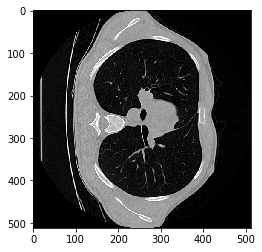

In [8]:
plt.imshow(low_2D_images[18], cmap='gray')

In [9]:
low_2D_images[0][250:252, 300:305]

array([[[0.68235294, 0.68235294, 0.68235294],
        [0.63529412, 0.63529412, 0.63529412],
        [0.60392157, 0.60392157, 0.60392157],
        [0.62745098, 0.62745098, 0.62745098],
        [0.67843137, 0.67843137, 0.67843137]],

       [[0.54117647, 0.54117647, 0.54117647],
        [0.55686275, 0.55686275, 0.55686275],
        [0.6       , 0.6       , 0.6       ],
        [0.47843137, 0.47843137, 0.47843137],
        [0.56470588, 0.56470588, 0.56470588]]])

In [10]:
max(low_2D_images[0].flatten()), min(low_2D_images[0].flatten())

(1.0, 0.0)

In [11]:
high_2D_images=np.array([get_data(path) for path in tqdm(high_images[:20])])
high_2D_images.shape

100%|██████████| 20/20 [00:00<00:00, 96.87it/s]


(20, 512, 512, 3)

In [12]:
high = np.array([1 for _ in range(len(high_2D_images))])
low = np.array([0 for _ in range(len(low_2D_images))])

high.shape, low.shape

((20,), (20,))

In [13]:
x_all = np.concatenate((high_2D_images, low_2D_images), axis=0)
y_all = np.concatenate((high, low), axis=0)
print(x_all.shape, y_all.shape)

(40, 512, 512, 3) (40,)


In [14]:
y_all

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
num_classes = 2
y_all = np_utils.to_categorical(y_all, num_classes)
y_all.shape

(40, 2)

In [16]:
np.save("{}/x_train.npy".format(TRAIN_DATASET_PATH), x_all)
np.save("{}/y_train.npy".format(TRAIN_DATASET_PATH), y_all)